In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')
# path = "/content/drive/My Drive/own_dataset_cv_cropped"

Mounted at /content/drive


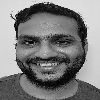

(100, 100)


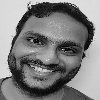

(100, 100)


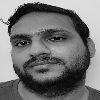

(100, 100)


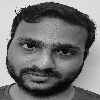

(100, 100)


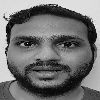

(100, 100)


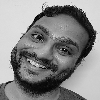

(100, 100)


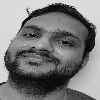

(100, 100)


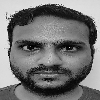

(100, 100)


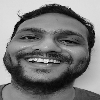

(100, 100)


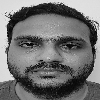

(100, 100)


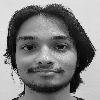

(100, 100)


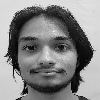

(100, 100)


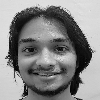

(100, 100)


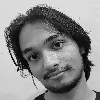

(100, 100)


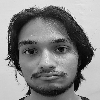

(100, 100)


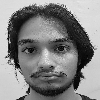

(100, 100)


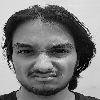

(100, 100)


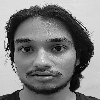

(100, 100)


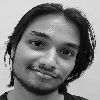

(100, 100)


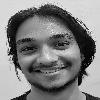

(100, 100)


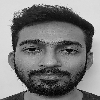

(100, 100)


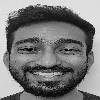

(100, 100)


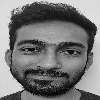

(100, 100)


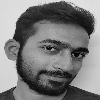

(100, 100)


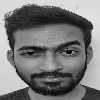

(100, 100)


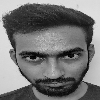

(100, 100)


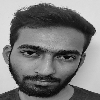

(100, 100)


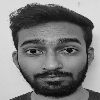

(100, 100)


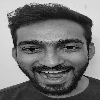

(100, 100)


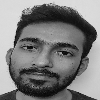

(100, 100)


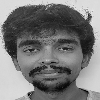

(100, 100)


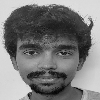

(100, 100)


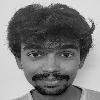

(100, 100)


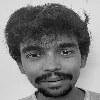

(100, 100)


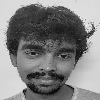

(100, 100)


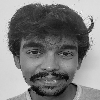

(100, 100)


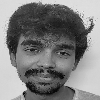

(100, 100)


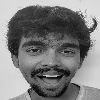

(100, 100)


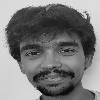

(100, 100)


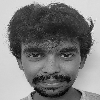

(100, 100)


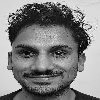

(100, 100)


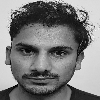

(100, 100)


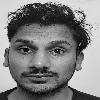

(100, 100)


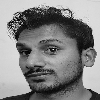

(100, 100)


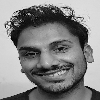

(100, 100)


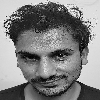

(100, 100)


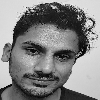

(100, 100)


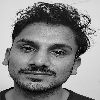

(100, 100)


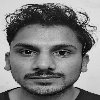

(100, 100)


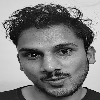

(100, 100)


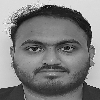

(100, 100)


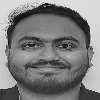

(100, 100)


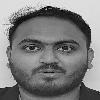

(100, 100)


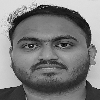

(100, 100)


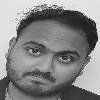

(100, 100)


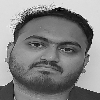

(100, 100)


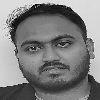

(100, 100)


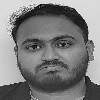

(100, 100)


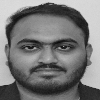

(100, 100)


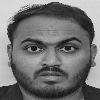

(100, 100)


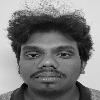

(100, 100)


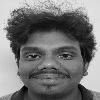

(100, 100)


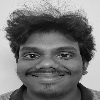

(100, 100)


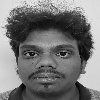

(100, 100)


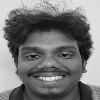

(100, 100)


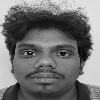

(100, 100)


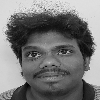

(100, 100)


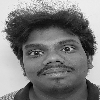

(100, 100)


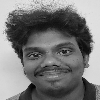

(100, 100)


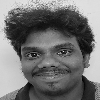

(100, 100)


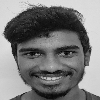

(100, 100)


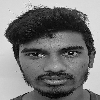

(100, 100)


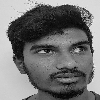

(100, 100)


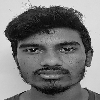

(100, 100)


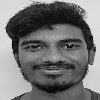

(100, 100)


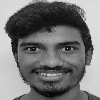

(100, 100)


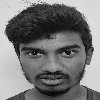

(100, 100)


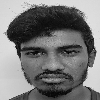

(100, 100)


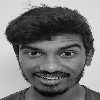

(100, 100)


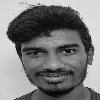

(100, 100)


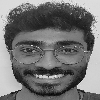

(100, 100)


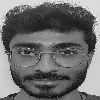

(100, 100)


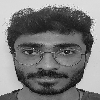

(100, 100)


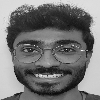

(100, 100)


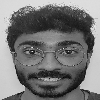

(100, 100)


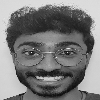

(100, 100)


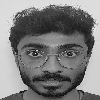

(100, 100)


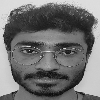

(100, 100)


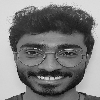

(100, 100)


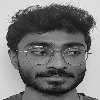

(100, 100)


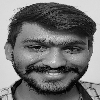

(100, 100)


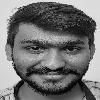

(100, 100)


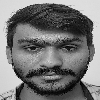

(100, 100)


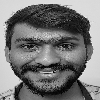

(100, 100)


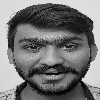

(100, 100)


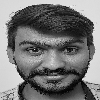

(100, 100)


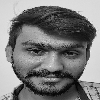

(100, 100)


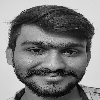

(100, 100)


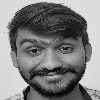

(100, 100)


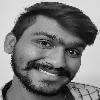

(100, 100)


In [2]:
data = []
lables = []
for j in range(10):
  for i in range(10):
      lables.append(j+1)
      img = cv2.imread("/content/drive/My Drive/own_dataset_cv_cropped/"+ str(j+1)+ "/" + str(i+1) + ".jpg",0)
      stretch_near = cv2.resize(img, (100,100), interpolation = cv2.INTER_LINEAR)
      cv2_imshow(stretch_near)
      print(stretch_near.shape)
      data.append(stretch_near)

In [5]:
data = np.array(data)
lables = np.array(lables)
X_train = list()
X_test = list()
y_train = list()
y_test = list()
for i in range(0, len(data), 10): # starts on index zero until the length of X for each 10
    person_X = data[i:i+10]
    person_y = lables[i:i+10]
    X_train_Person = person_X[:8]
    X_test_Person =  person_X[8:10]
    y_train_Person = person_y[:8]
    y_test_Person = person_y[8:10] 
                                                                                
    X_train.extend(X_train_Person)
    X_test.extend(X_test_Person)
    y_train.extend(y_train_Person)
    y_test.extend(y_test_Person)

In [6]:
X_train = np.array(X_train)
X_train = X_train.reshape(80,100,100)
X_test = np.array(X_test)
X_test = X_test.reshape(20,100,100)
y_train = np.array(y_train)
y_test = np.array(y_test)

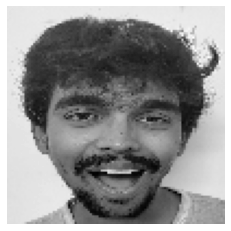

In [7]:
plt.axis('off')
plt.imshow(np.array(X_train)[31],cmap='gray',)

In [8]:
X_train = X_train.reshape(80,10000)
X_test = X_test.reshape(20,10000)

**Fisher Faces Method**

In [9]:
# Compute the PCA transformation on the training data
n_components = 50
pca = PCA(n_components)  # choose the number of components
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


# Compute the class means
class_means = []
for i in range(1, 11):  # there are 10 subjects in the dataset
    class_i_indices = np.where(y_train == i)[0]
    class_i_mean = np.mean(X_train_pca[class_i_indices], axis=0)
    class_means.append(class_i_mean)

# Compute the within-class scatter matrix
S_w = np.zeros((n_components, n_components))
for i in range(1, 11):
    class_i_indices = np.where(y_train == i)[0]
    class_i_scatter = np.zeros((n_components, n_components))
    for j in class_i_indices:
        diff = (X_train_pca[j] - class_means[i-1]).reshape(-1, 1)
        class_i_scatter += np.dot(diff, diff.T)
    S_w += class_i_scatter

# Compute the between-class scatter matrix
overall_mean = np.mean(X_train_pca, axis=0)
S_b = np.zeros((n_components, n_components))
for i in range(1, 11):
    n_i = np.sum(y_train == i)
    diff = (class_means[i-1] - overall_mean).reshape(-1, 1)
    S_b += n_i * np.dot(diff, diff.T)

# Compute the Fisherfaces
S_w_inv = np.linalg.inv(S_w)
S_w_inv_S_b = np.dot(S_w_inv, S_b)
eigvals, eigvecs = np.linalg.eig(S_w_inv_S_b)
idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]
print(eigvecs.shape)
W_fisher = eigvecs[:, :48]  # choose the number of Fisherfaces

# Project the data onto the Fisherface subspace
X_train_fisher = np.dot(X_train_pca, W_fisher)
X_test_fisher = np.dot(X_test_pca, W_fisher)
X_train_fisher.shape

(50, 50)


(80, 48)

In [10]:
X_train_fisher = X_train_fisher.astype("float32")

<ipython-input-10-7f9841f09bfa>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  X_train_fisher = X_train_fisher.astype("float32")


Showing the Fisher Faces


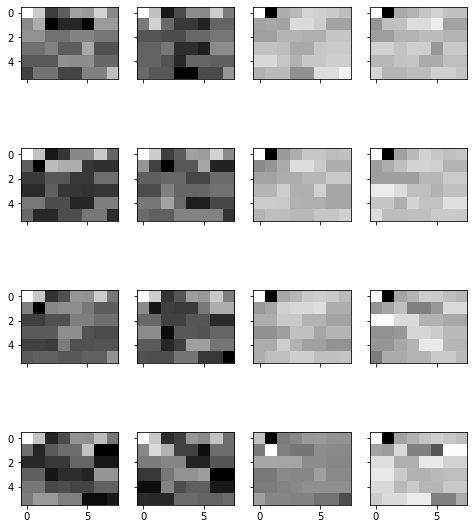

In [11]:
# Show the first 16 eigenfaces
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(X_train_fisher[i].reshape(6,8), cmap="gray")
print("Showing the Fisher Faces")
plt.show()

In [12]:
# Perform classification using Euclidean distance
y_pred = []
for i in range(X_test_fisher.shape[0]):
    distances = []
    for j in range(X_train_fisher.shape[0]):
        dist = np.linalg.norm(X_test_fisher[i] - X_train_fisher[j])
        distances.append(dist)
    nearest_neighbor = np.argmin(distances)
    y_pred.append(y_train[nearest_neighbor])

# Compute the accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.85


In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)
precision = precision_score(y_test, y_pred,average='macro')
print("Precision:")
print(precision)
recall = recall_score(y_test, y_pred,average='macro')
print("Recall:")
print(recall)
f1_score = f1_score(y_test, y_pred,average='macro')
print("F1 score:")
print(f1_score)

Confusion matrix:
[[2 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 2 0]
 [1 0 0 0 0 0 0 0 0 1]]
Precision:
0.9166666666666666
Recall:
0.85
F1 score:
0.8466666666666667


**Local binary Pattern Method**

In [14]:
#Reshape the array
X_train = X_train.reshape(80,100,100)
X_test = X_test.reshape(20,100,100)
# Train the LBP face recognizer on the training data
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.train(X_train, y_train)
recognizer.write('trained_data.xml')
y_pred = []
# Test the LBP face recognizer on the test data
correct = 0
for i in range(len(X_test)):
    img = X_test[i]
    label, confidence = recognizer.predict(img)
    y_pred.append(label)
    if label == y_test[i]:
        correct += 1

accuracy = correct / len(X_test)
print('Accuracy:', accuracy)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)
precision = precision_score(y_test, y_pred,average='macro')
print("Precision:")
print(precision)
recall = recall_score(y_test, y_pred,average='macro')
print("Recall:")
print(recall)
f1_score = f1_score(y_test, y_pred,average='macro')
print("F1 score:")
print(f1_score)

Accuracy: 0.95
Confusion matrix:
[[2 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 2]]
Precision:
0.9666666666666666
Recall:
0.95
F1 score:
0.9466666666666667
